This is a simple piece if code that uses only NumPy to run the very basic pereptron algorithm.

- no OOP
- no multilayer stuff
- no bias
- single batch 

*** The goal is to hard-code feedforward and backpropagation stuff in the simplest way.

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# define sigmoid function
def sigmoid(dot_product):
    output = 1/(1 + np.exp(-dot_product)) 
    return output

In [138]:
# The setup
np.random.seed(19)
y = np.array([0.11]) # output
X = np.array([2,1,1,4]) # input
w = np.random.rand(4,) # random weights vector
epochs = range(20) # epochs to train 
learning_rate = 0.5 # seems too high
length_of_X = range(len(X)) # for a range
n = len(X) # how many elements are there in X vector?

# plotting management
error_list = []
epochs_x = list(epochs)

In [139]:
for epoch in epochs:
# FEED FORWARD
    print('EPOCH: {}'.format(epoch))
    print('TARGET: {}'.format(y))
    
    # Predicting y
    y_hat = np.array(sigmoid(np.dot(X,w)))
    print('PREDICTION: {}'.format(y_hat))
    # Print weights
    #print('WEIGHTS: {}'.format(w))
    # How wrong is the prediction? 
    #It's not the mean squared error because we don't have multiple outputs
    se = np.power(np.subtract(y,y_hat),2)
    
    print('ERROR: {}'.format(se))
    error_list.append(se)
   
    # BACKPROPAGATION

    # Derivative calculation
    chain_1 = np.multiply(np.subtract(y,y_hat),2)
    #print('DERIVATIVE#1: {}'.format(chain_1))

    chain_2 = np.array(sigmoid(np.dot(X,w))*(1-sigmoid(np.dot(X,w))))
    #print('DERIVATIVE#2: {}'.format(chain_2))
  
    chain_3 = X # the derivative of a*x is a!
    #print('DERIVATIVE#3: {}'.format(chain_3))

    # DECLARING NEGATIVE GRADIENT (INCLUDING THE LEARNING RATE)
    neg_grad = -(chain_1*chain_2*chain_3)*learning_rate
    print('GRADIENT: {}'.format(neg_grad))
    #print('NEGATIVE_GRADIENT: {}'.format(neg_grad))


    # UPDATING THE WEIGHTS 
    w = np.subtract(w,neg_grad)
    #print('WEIGHTS: {}'.format(w))
    print('-------')   

EPOCH: 0
TARGET: [0.11]
PREDICTION: 0.8526805532479185
ERROR: [0.5515744]
GRADIENT: [0.18658576 0.09329288 0.09329288 0.37317151]
-------
EPOCH: 1
TARGET: [0.11]
PREDICTION: 0.42637376837141544
ERROR: [0.10009236]
GRADIENT: [0.15475687 0.07737844 0.07737844 0.30951374]
-------
EPOCH: 2
TARGET: [0.11]
PREDICTION: 0.11930929377762206
ERROR: [8.66629506e-05]
GRADIENT: [0.00195634 0.00097817 0.00097817 0.00391268]
-------
EPOCH: 3
TARGET: [0.11]
PREDICTION: 0.11706657528110816
ERROR: [4.99364862e-05]
GRADIENT: [0.00146083 0.00073042 0.00073042 0.00292166]
-------
EPOCH: 4
TARGET: [0.11]
PREDICTION: 0.11541583053932748
ERROR: [2.93312204e-05]
GRADIENT: [0.00110586 0.00055293 0.00055293 0.00221172]
-------
EPOCH: 5
TARGET: [0.11]
PREDICTION: 0.11417969952253705
ERROR: [1.74698881e-05]
GRADIENT: [0.00084549 0.00042275 0.00042275 0.00169098]
-------
EPOCH: 6
TARGET: [0.11]
PREDICTION: 0.1132424006646306
ERROR: [1.05131621e-05]
GRADIENT: [0.00065119 0.0003256  0.0003256  0.00130239]
-------
EPO

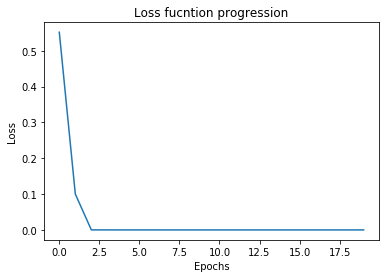

In [137]:
plt.plot(epochs_x, error_list)
plt.title('Loss fucntion progression')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()